# Modeling of Student Data

<a id='Data_loading_merging'></a>
### 1.1 Data Loading and Merging

In [1]:
%reset -f
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy import stats
import seaborn as sns


<a id='Data_loading'></a>
### 1.1.1 Data Loading

In [2]:
data_studentInfo=pd.read_csv("studentInfo.csv")
data_assesments=pd.read_csv("students_asses_combined.csv")
data_vle=pd.read_csv("vle_combined.csv")

print("Number of data points in studentInfo.csv",data_studentInfo.shape[0])
print("Number of data points in students_asses_combined.csv",data_assesments.shape[0])
print("Number of data points in vle_combined.csv",data_vle.shape[0])


Number of data points in studentInfo.csv 32593
Number of data points in students_asses_combined.csv 32593
Number of data points in vle_combined.csv 32593


In [3]:
columns_info=data_studentInfo.columns
data_studentInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [4]:
data_assesments.pop("Unnamed: 0")
columns_asses=data_assesments.columns
data_assesments.head()

,code_module,code_presentation,id_student,CS20,CS40,CS60,CS80,CS100,PCS20,PCS40,...,LS40,LS60,LS80,LS100,RS20,RS40,RS60,RS80,RS100,date_registration
0,AAA,2013J,11391,7.8,24.8,40.8,57.8,82.4,7.800000e+01,8.266667e+01,...,0,0,0,0,78.0,81.5,81.000000,82.00,82.0,-159.0
1,AAA,2013J,28400,7.0,20.6,34.6,47.4,65.4,7.000000e+01,6.866667e+01,...,1,2,2,2,70.0,69.0,69.333333,68.00,66.4,-53.0
2,AAA,2013J,30268,0.0,0.0,0.0,0.0,0.0,1.000000e-15,3.333333e-16,...,0,0,0,0,0.0,0.0,0.000000,0.00,0.0,-92.0
3,AAA,2013J,31604,7.2,21.4,36.2,53.8,76.3,7.200000e+01,7.133333e+01,...,0,0,0,0,72.0,71.5,72.333333,76.25,76.0,-52.0
4,AAA,2013J,32885,6.9,12.9,25.5,32.5,55.0,6.900000e+01,4.300000e+01,...,2,3,4,5,69.0,49.5,54.000000,49.25,54.4,-176.0


In [5]:
data_vle.pop("Unnamed: 0")
columns_vle=data_vle.columns
data_vle.head()

,code_module,code_presentation,id_student,sum_clicks0,sum_clicks20,sum_clicks40,sum_clicks60,sum_clicks80,sum_clicks100,mean_clicks0,mean_clicks20,mean_clicks40,mean_clicks60,mean_clicks80,mean_clicks100
0,AAA,2013J,11391,147,528,628,713,791,934,6.904545,4.723002,4.206386,4.415033,4.424001,4.250956
1,AAA,2013J,28400,263,669,874,1063,1417,1435,3.287954,3.154050,2.857137,2.625161,2.798992,2.732375
2,AAA,2013J,30268,102,281,281,281,281,281,2.491162,3.469192,3.469192,3.469192,3.469192,3.469192
3,AAA,2013J,31604,169,799,1181,1550,1896,2158,3.624762,2.956942,3.139172,3.025253,2.986959,3.007250
4,AAA,2013J,32885,295,601,742,826,913,1034,3.954785,3.510630,3.285475,3.027455,2.813736,2.685387


<a id='Data_merging'></a>
### 1.1.2 Data Merging

The student info, student assesmennts, and vle csv files are comined into a single data frame

In [6]:
data_studentInfo=pd.merge(data_studentInfo, data_assesments, how='left', on=['code_module','code_presentation','id_student'])
data_studentInfo=pd.merge(data_studentInfo, data_vle, how='left', on=['code_module','code_presentation','id_student'])
data_studentInfo.head()


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,sum_clicks40,sum_clicks60,sum_clicks80,sum_clicks100,mean_clicks0,mean_clicks20,mean_clicks40,mean_clicks60,mean_clicks80,mean_clicks100
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,628,713,791,934,6.904545,4.723002,4.206386,4.415033,4.424001,4.250956
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,874,1063,1417,1435,3.287954,3.154050,2.857137,2.625161,2.798992,2.732375
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,...,281,281,281,281,2.491162,3.469192,3.469192,3.469192,3.469192,3.469192
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,...,1181,1550,1896,2158,3.624762,2.956942,3.139172,3.025253,2.986959,3.007250
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,...,742,826,913,1034,3.954785,3.510630,3.285475,3.027455,2.813736,2.685387


#### Cleaning the data in student info

In [7]:
data_studentInfo[data_studentInfo["imd_band"]=='?'].shape
mode_imd=stats.mode(data_studentInfo["imd_band"].values)[0][0]

for ind in range(0,data_studentInfo.shape[0]):
    
    if data_studentInfo.iloc[[ind]]["imd_band"].values[0]=='?':
        data_studentInfo.at[ind,"imd_band"]=mode_imd
    

#### Creating alabels for different attributes

In [8]:
cat_columns=data_studentInfo.columns[data_studentInfo.dtypes==object].tolist()
cat_columns.remove("final_result")

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for arg in cat_columns:    
    le.fit(data_studentInfo[arg].values)    
    data_studentInfo[arg]=le.transform(data_studentInfo[arg])


In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data_studentInfo["final_result"].values)

clases={}
for arg in data_studentInfo["final_result"].unique():   
    clases[arg]=le.transform([arg])[0]
    
data_studentInfo["final_result"]=le.transform(data_studentInfo["final_result"])
print(clases)

data_studentInfo.pop("id_student")
data_studentInfo.head()

{'Pass': 2, 'Withdrawn': 3, 'Fail': 1, 'Distinction': 0}


,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,...,sum_clicks40,sum_clicks60,sum_clicks80,sum_clicks100,mean_clicks0,mean_clicks20,mean_clicks40,mean_clicks60,mean_clicks80,mean_clicks100
0,0,1,1,0,1,9,2,0,240,0,...,628,713,791,934,6.904545,4.723002,4.206386,4.415033,4.424001,4.250956
1,0,1,0,6,1,2,1,0,60,0,...,874,1063,1417,1435,3.287954,3.154050,2.857137,2.625161,2.798992,2.732375
2,0,1,0,5,0,3,1,0,60,1,...,281,281,281,281,2.491162,3.469192,3.469192,3.469192,3.469192,3.469192
3,0,1,0,7,0,5,1,0,60,0,...,1181,1550,1896,2158,3.624762,2.956942,3.139172,3.025253,2.986959,3.007250
4,0,1,0,11,2,5,0,0,60,0,...,742,826,913,1034,3.954785,3.510630,3.285475,3.027455,2.813736,2.685387


# Modeling

#### Below is a customized function that can train and test using  DecisionTree, RandomForest, GaussianNB, GradientBoosting

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

def fit_model(modeltype,X,y,kf):
    
    perform_table={"precision":[],"recall":[],"fscore":[],"mat":[]
                  ,"precision_avgd":[],"recall_avgd":[],"fscore_avgd":[]} 
    
    for train,test in tqdm(kf.split(X)):
        
        if modeltype=="DecisionTree":
            model = DecisionTreeClassifier(class_weight='balanced')
            
        elif modeltype=="RandomForest":
            model = RandomForestClassifier(n_estimators=100,class_weight='balanced')
        
        elif modeltype=="GaussianNB":
            model = GaussianNB()

        elif modeltype=="GradientBoosting":
            model = GradientBoostingClassifier()
            
        model.fit(X[train,:], y[train,])        
        y_pred = model.predict(X[test,:])
        
        perform_table["mat"].append(confusion_matrix(y_pred,y[test,]))
        
        dum=precision_recall_fscore_support(y_pred,y[test,])
        perform_table["precision"].append(dum[0])
        perform_table["recall"].append(dum[1])
        perform_table["fscore"].append(dum[2])
        
        dum=np.array(precision_recall_fscore_support(y_pred,y[test,], average='weighted'))
        perform_table["precision_avgd"].append(dum[0])
        perform_table["recall_avgd"].append(dum[1])
        perform_table["fscore_avgd"].append(dum[2])
    
    mat=perform_table["mat"][0]
    precision=perform_table["precision"][0]
    recall=perform_table["recall"][0]
    fscore=perform_table["fscore"][0]
    precision_avgd=perform_table["precision_avgd"][0]
    recall_avgd=perform_table["recall_avgd"][0]
    fscore_avgd=perform_table["fscore_avgd"][0]
    Nlen=len(perform_table["mat"])
    
    for i in range(1,Nlen):
        mat=mat+perform_table["mat"][i]
        precision=precision+perform_table["precision"][i]
        recall=recall+perform_table["recall"][i]
        fscore=fscore+perform_table["fscore"][i]
        
        precision_avgd=precision_avgd+perform_table["precision_avgd"][i]
        recall_avgd=recall_avgd+perform_table["recall_avgd"][i]
        fscore_avgd=fscore_avgd+perform_table["fscore_avgd"][i]

    perform_table["mat"]=mat
    perform_table["precision"]=precision/Nlen
    perform_table["recall"]=recall/Nlen
    perform_table["fscore"]=fscore/Nlen

    perform_table["precision_avgd"]=precision_avgd/Nlen
    perform_table["recall_avgd"]=recall_avgd/Nlen
    perform_table["fscore_avgd"]=fscore_avgd/Nlen
    
    return perform_table


#### Custimized function that updates the peformance table

In [11]:
def update_perform_table(model_table,model_type,index,update="New",detailed_table=None):
    
    if update=="New":
        detailed_table={}
        
        dum=list(model_table['precision'])
        dum.append((model_table['precision_avgd']))        
        detailed_table["precision"]=dum
        
        dum=list(model_table['recall'])
        dum.append((model_table['recall_avgd']))        
        detailed_table["recall"]=dum

        dum=list(model_table['fscore'])
        dum.append((model_table['fscore_avgd']))        
        detailed_table["fscore"]=dum
        
        pred=model_table['mat'].diagonal()
        true=np.sum(model_table['mat'],axis=1)   
        
        dum=list(pred/true)        
        dum.append(np.sum(pred)/np.sum(true))
        detailed_table["accuracy"]=dum
                
        detailed_table["precision"]=pd.DataFrame(detailed_table["precision"],index=index)
        detailed_table["precision"]=detailed_table["precision"].rename(columns={0:model_type})
        detailed_table["precision"].columns.name="Precision"

        detailed_table["recall"]=pd.DataFrame(detailed_table["recall"],index=index)
        detailed_table["recall"]=detailed_table["recall"].rename(columns={0:model_type})
        detailed_table["recall"].columns.name="Recall"

        detailed_table["fscore"]=pd.DataFrame(detailed_table["fscore"],index=index)
        detailed_table["fscore"]=detailed_table["fscore"].rename(columns={0:model_type})
        detailed_table["fscore"].columns.name="F-score"

        detailed_table["accuracy"]=pd.DataFrame(detailed_table["accuracy"],index=index)
        detailed_table["accuracy"]=detailed_table["accuracy"].rename(columns={0:model_type})
        detailed_table["accuracy"].columns.name="Accuracy"
        
    else:
        
        dum=list(model_table['precision'])
        dum.append((model_table['precision_avgd']))     
        detailed_table["precision"][model_type]=dum
        
        dum=list(model_table['recall'])
        dum.append((model_table['recall_avgd']))        
        detailed_table["recall"][model_type]=dum

        dum=list(model_table['fscore'])
        dum.append((model_table['fscore_avgd']))        
        detailed_table["fscore"][model_type]=dum
        
        pred=model_table['mat'].diagonal()
        true=np.sum(model_table['mat'],axis=1)   
        
        dum=list(pred/true)        
        dum.append(np.sum(pred)/np.sum(true))
        detailed_table["accuracy"][model_type]=dum
        
    return detailed_table

from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

### Considering only Biographic information

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import copy

x_clmns=list(columns_info.values)
remove_clmns=["final_result","id_student"]

for arg in remove_clmns:
    x_clmns.remove(arg)   

y_clmns=["final_result"]

X=data_studentInfo[x_clmns].values
y=data_studentInfo[y_clmns].values[:,0]
nfolds=10

kf = KFold(n_splits=nfolds,shuffle=True,random_state=1)


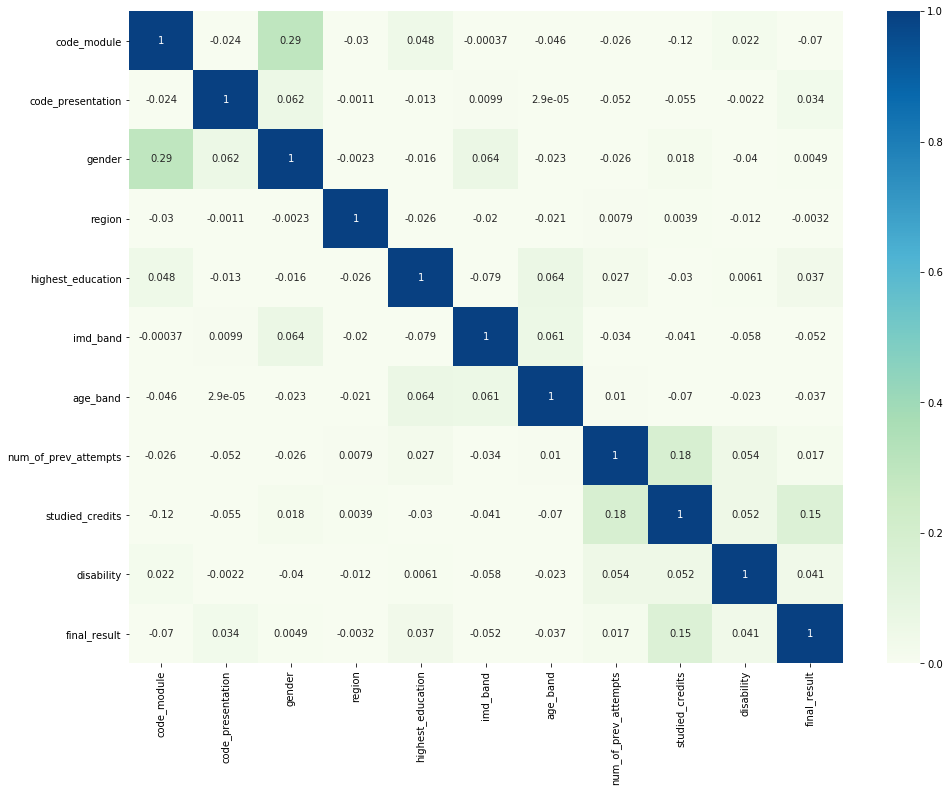

In [13]:
import copy
dum=copy.deepcopy(x_clmns)
dum.append("final_result")

plt.figure(figsize=(16,12))
sns.heatmap(data_studentInfo[dum].corr(), annot = True, vmin = 0, cmap = 'GnBu')
plt.show()

Above plot shows that there is no strong correlation of final_result with any of the attribute. All the attributes are considerd for modeling

In [14]:
index=list(le.inverse_transform(np.unique(y)))
index.append("Averaged")

model_type="DecisionTree"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,model_type,index)

model_type="RandomForest"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,model_type,index,update="Update",detailed_table=detailed_table)

model_type="GaussianNB"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,model_type,index,update="Update",detailed_table=detailed_table)

model_type="GradientBoosting"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,model_type,index,update="Update",detailed_table=detailed_table)


display_side_by_side(detailed_table["precision"],detailed_table["recall"],
                     detailed_table["fscore"],detailed_table["accuracy"])

10it [00:01,  8.15it/s]
10it [00:30,  3.04s/it]
10it [00:00, 46.11it/s]
10it [01:25,  8.58s/it]


Precision,DecisionTree,RandomForest,GaussianNB,GradientBoosting
Distinction,0.218249,0.159349,0.010566,0.008902
Fail,0.282956,0.248100,0.107505,0.110155
Pass,0.352677,0.449521,0.785669,0.725746
Withdrawn,0.366796,0.424502,0.289556,0.479894
Averaged,0.321833,0.376547,0.636528,0.607627
Recall,DecisionTree,RandomForest,GaussianNB,GradientBoosting
Distinction,0.146743,0.170250,0.235141,0.342262
Fail,0.255351,0.271893,0.358473,0.391796
Pass,0.421930,0.438182,0.410905,0.447745
Withdrawn,0.375267,0.405588,0.438216,0.464161


Performance is very poor using only biogrpahic information. Further, the performance for Fail class is very bad. The goal of this project is to provide a good performance for Faill class so that the students at risk can be well informed

### Considering Biographic + VLE

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import copy

x_clmns=list(columns_info.values)
for arg in list(columns_vle.values):
    x_clmns.append(arg)
x_clmns=list(set(x_clmns))
    
remove_clmns=["final_result","id_student"]

notreq_len=[20,40,60,80]
# notreq_len=[]
for arg in notreq_len:
    remove_clmns.append("mean_clicks"+str(arg))
    remove_clmns.append("sum_clicks"+str(arg))
    
for arg in remove_clmns:
    x_clmns.remove(arg)   

y_clmns=["final_result"]

X=data_studentInfo[x_clmns].values
y=data_studentInfo[y_clmns].values[:,0]
nfolds=10

kf = KFold(n_splits=nfolds,shuffle=True,random_state=1)


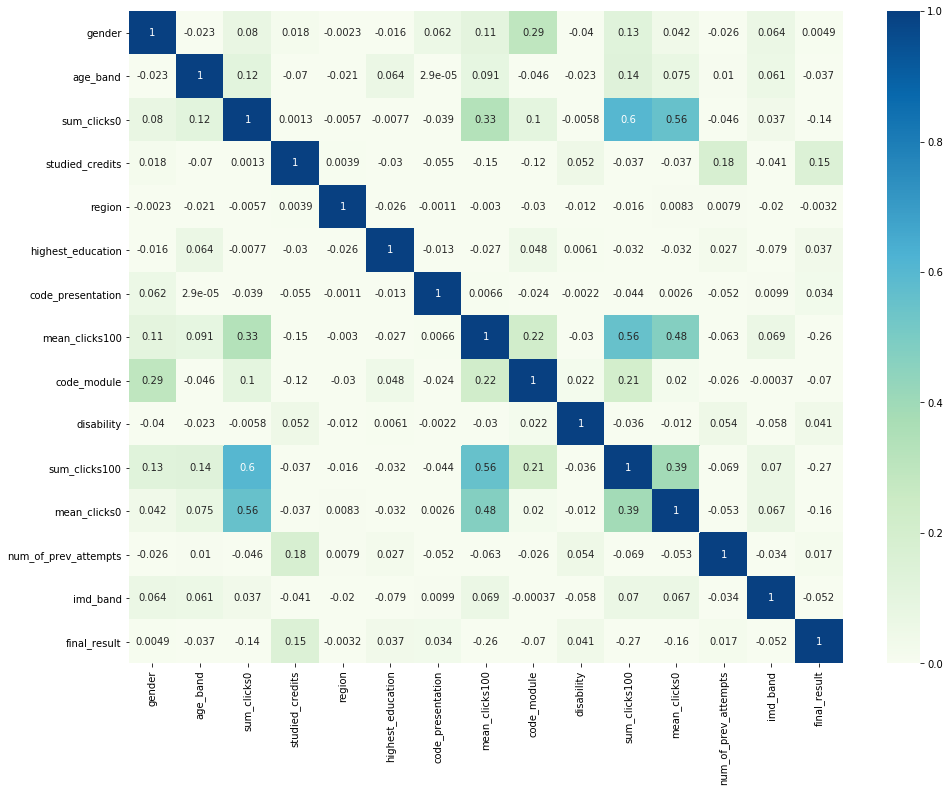

In [16]:
import copy
dum=copy.deepcopy(x_clmns)
dum.append("final_result")

plt.figure(figsize=(16,12))
sns.heatmap(data_studentInfo[dum].corr(), annot = True, vmin = 0, cmap = 'GnBu')
plt.show()

There correlation of final_result with all the attributes are similar. The coorelation between sum clicks and mean clicks is significant but much farther than one. Hence all attributes are conidered for modelling

In [17]:
index=list(le.inverse_transform(np.unique(y)))
index.append("Averaged")

model_type="DecisionTree"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,model_type,index)

model_type="RandomForest"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,model_type,index,update="Update",detailed_table=detailed_table)

model_type="GaussianNB"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,model_type,index,update="Update",detailed_table=detailed_table)

model_type="GradientBoosting"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,model_type,index,update="Update",detailed_table=detailed_table)


display_side_by_side(detailed_table["precision"],detailed_table["recall"],
                     detailed_table["fscore"],detailed_table["accuracy"])

10it [00:02,  4.34it/s]
10it [00:42,  4.21s/it]
10it [00:00, 42.94it/s]
10it [02:54, 17.49s/it]


Precision,DecisionTree,RandomForest,GaussianNB,GradientBoosting
Distinction,0.242168,0.056463,0.158500,0.059339
Fail,0.342069,0.281595,0.158956,0.286284
Pass,0.613584,0.908749,0.537959,0.914124
Withdrawn,0.629173,0.720685,0.784633,0.741946
Averaged,0.525010,0.762497,0.598519,0.774856
Recall,DecisionTree,RandomForest,GaussianNB,GradientBoosting
Distinction,0.244504,0.454275,0.282134,0.491313
Fail,0.337423,0.492128,0.319242,0.521508
Pass,0.617899,0.625268,0.584325,0.631637
Withdrawn,0.628427,0.716308,0.498441,0.719671


### Considering Biographic + VLE + assements

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

x_clmns=data_studentInfo.columns.tolist()
remove_clmns=["final_result","mean_clicks0","sum_clicks0"]

notreq_len=[20,40,60,80]
# notreq_len=[]
for arg in notreq_len:
    remove_clmns.append("CS"+str(arg))
    remove_clmns.append("PCS"+str(arg))
    remove_clmns.append("LS"+str(arg))
    remove_clmns.append("mean_clicks"+str(arg))
    remove_clmns.append("sum_clicks"+str(arg))
    remove_clmns.append("RS"+str(arg))

for arg in remove_clmns:
    x_clmns.remove(arg)   

y_clmns=["final_result"]


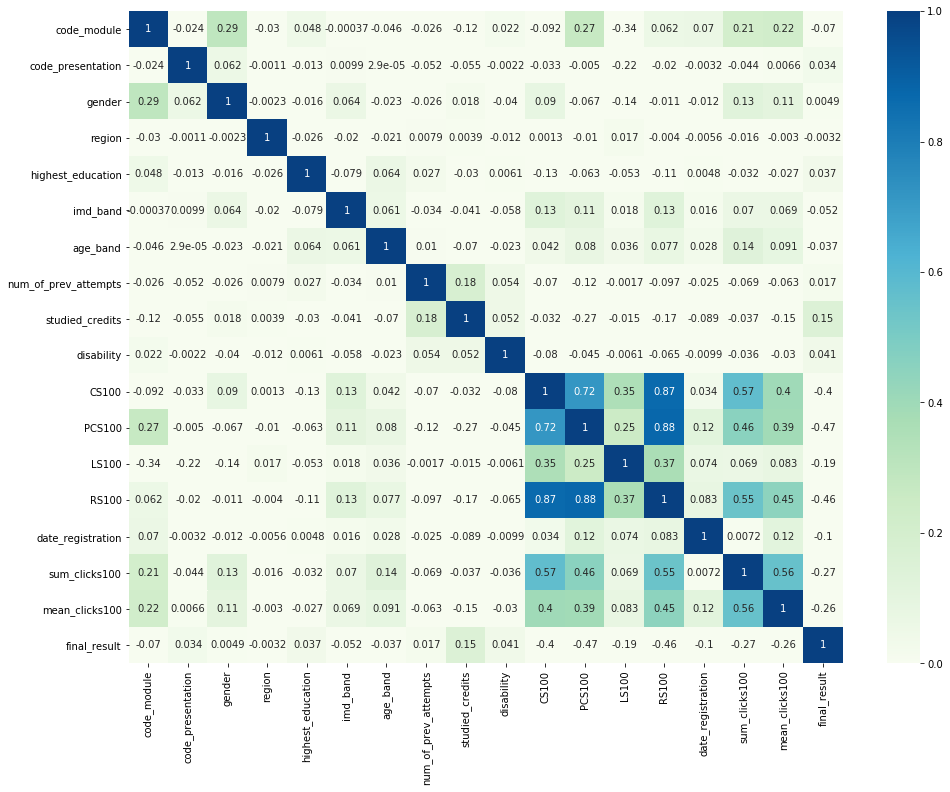

In [19]:
import copy
dum=copy.deepcopy(x_clmns)
dum.append("final_result")

plt.figure(figsize=(16,12))
sns.heatmap(data_studentInfo[dum].corr(), annot = True, vmin = 0, cmap = 'GnBu')
plt.show()

The final_result is strongly coorelated to assments data and assements data would improve the accuracy. It is also obsorved that the corelation of Raw score (RS) with CS and PCS is very high. So, First the modeling is done using all attributes and then by removing CS and PCS 

### Considering all columns

In [20]:
X=data_studentInfo[x_clmns].values
y=data_studentInfo[y_clmns].values[:,0]
nfolds=10

kf = KFold(n_splits=nfolds,shuffle=True,random_state=1)

index=list(le.inverse_transform(np.unique(y)))
index.append("Averaged")

model_type="DecisionTree"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,model_type,index)

model_type="RandomForest"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,model_type,index,update="Update",detailed_table=detailed_table)

model_type="GaussianNB"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,model_type,index,update="Update",detailed_table=detailed_table)

model_type="GradientBoosting"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,model_type,index,update="Update",detailed_table=detailed_table)


display_side_by_side(detailed_table["precision"],detailed_table["recall"],
                     detailed_table["fscore"],detailed_table["accuracy"])

10it [00:02,  3.50it/s]
10it [00:51,  5.13s/it]
10it [00:00, 41.01it/s]
10it [03:45, 22.52s/it]


Precision,DecisionTree,RandomForest,GaussianNB,GradientBoosting
Distinction,0.470678,0.454605,0.593252,0.510194
Fail,0.418014,0.369275,0.337920,0.372374
Pass,0.746996,0.904188,0.726233,0.895247
Withdrawn,0.702935,0.827850,0.830529,0.839804
Averaged,0.636258,0.775531,0.685650,0.777529
Recall,DecisionTree,RandomForest,GaussianNB,GradientBoosting
Distinction,0.486111,0.658423,0.445188,0.666348
Fail,0.410201,0.580590,0.460277,0.591410
Pass,0.743874,0.757375,0.763810,0.764331
Withdrawn,0.709560,0.746892,0.724878,0.750793


Performance have improved by considering the assessments information


### Removing CS and PCS columns

In [21]:
x_clmns.remove("CS100")
x_clmns.remove("PCS100")

X=data_studentInfo[x_clmns].values
y=data_studentInfo[y_clmns].values[:,0]
nfolds=10

kf = KFold(n_splits=nfolds,shuffle=True,random_state=1)

index=list(le.inverse_transform(np.unique(y)))
index.append("Averaged")

model_type="DecisionTree"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,model_type,index)

model_type="RandomForest"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,model_type,index,update="Update",detailed_table=detailed_table)

model_type="GaussianNB"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,model_type,index,update="Update",detailed_table=detailed_table)

model_type="GradientBoosting"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,model_type,index,update="Update",detailed_table=detailed_table)


display_side_by_side(detailed_table["precision"],detailed_table["recall"],
                     detailed_table["fscore"],detailed_table["accuracy"])

10it [00:02,  4.32it/s]
10it [00:39,  4.00s/it]
10it [00:00, 43.69it/s]
10it [03:01, 18.14s/it]


Precision,DecisionTree,RandomForest,GaussianNB,GradientBoosting
Distinction,0.439985,0.368380,0.320328,0.435175
Fail,0.414451,0.345390,0.251737,0.363264
Pass,0.718664,0.917757,0.820249,0.896971
Withdrawn,0.699213,0.818694,0.842964,0.829335
Averaged,0.620008,0.780201,0.724118,0.772827
Recall,DecisionTree,RandomForest,GaussianNB,GradientBoosting
Distinction,0.439427,0.663360,0.473036,0.655877
Fail,0.407702,0.568347,0.421597,0.579026
Pass,0.728987,0.736329,0.722847,0.746718
Withdrawn,0.695802,0.740864,0.695805,0.744306


The performance is same by removing CS and PCS columns. For further analysis, CS and PCS were not conisdered.

### Combining Distinction and Pass classes

To improve the accuracy, distinction and pass classes were combined, as both are of similar and the goal is to improve the performance for fail class

In [22]:
%%time
ind=np.where(y==clases["Distinction"])
y[ind]=clases["Pass"]

index=list(le.inverse_transform(np.unique(y)))
index.append("Averaged")

model_type="DecisionTree"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,model_type,index)

model_type="RandomForest"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,model_type,index,update="Update",detailed_table=detailed_table)

model_type="GaussianNB"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,model_type,index,update="Update",detailed_table=detailed_table)

model_type="GradientBoosting"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,model_type,index,update="Update",detailed_table=detailed_table)


display_side_by_side(detailed_table["precision"],detailed_table["recall"],
                     detailed_table["fscore"],detailed_table["accuracy"])

10it [00:02,  4.46it/s]
10it [00:35,  3.58s/it]
10it [00:00, 46.54it/s]
10it [02:12, 13.21s/it]


Precision,DecisionTree,RandomForest,GaussianNB,GradientBoosting
Fail,0.408375,0.359977,0.258389,0.361684
Pass,0.867538,0.964141,0.916249,0.960597
Withdrawn,0.693730,0.819863,0.842964,0.832312
Averaged,0.712111,0.832034,0.801588,0.835858
Recall,DecisionTree,RandomForest,GaussianNB,GradientBoosting
Fail,0.400259,0.569432,0.421735,0.584236
Pass,0.876358,0.875019,0.882584,0.875845
Withdrawn,0.692928,0.744542,0.695805,0.744525
Averaged,0.713987,0.788421,0.751081,0.791060
F-score,DecisionTree,RandomForest,GaussianNB,GradientBoosting


Wall time: 2min 50s


Performance have improved by combining distinction and pass class into pass. To improve the results furtherm the data of withdrawn studens were removed as the information is missing and skewing the preiction performance.

### Removing Withdrawn Students data

In [23]:
%%time
ind=np.where(y==clases["Withdrawn"])
y=np.delete(y,ind)
X=np.delete(X,ind,0)

index=list(le.inverse_transform(np.unique(y)))
index.append("Averaged")

model_type="DecisionTree"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,model_type,index)

model_type="RandomForest"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,model_type,index,update="Update",detailed_table=detailed_table)

model_type="GaussianNB"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,model_type,index,update="Update",detailed_table=detailed_table)

model_type="GradientBoosting"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,model_type,index,update="Update",detailed_table=detailed_table)


display_side_by_side(detailed_table["precision"],detailed_table["recall"],
                     detailed_table["fscore"],detailed_table["accuracy"])

10it [00:01,  7.33it/s]
10it [00:21,  2.15s/it]
10it [00:00, 66.26it/s]
10it [00:29,  2.91s/it]


Precision,DecisionTree,RandomForest,GaussianNB,GradientBoosting
Fail,0.760969,0.751460,0.779373,0.753529
Pass,0.892711,0.963774,0.916823,0.964826
Averaged,0.851624,0.908352,0.875428,0.909715
Recall,DecisionTree,RandomForest,GaussianNB,GradientBoosting
Fail,0.764491,0.904609,0.810935,0.907438
Pass,0.890505,0.894107,0.900535,0.894979
Averaged,0.851095,0.896912,0.873468,0.898249
F-score,DecisionTree,RandomForest,GaussianNB,GradientBoosting
Fail,0.762376,0.820811,0.794526,0.823133
Pass,0.891521,0.927594,0.908531,0.928537


Wall time: 52.2 s


Modifying the data to consider only Pass and Fail have improved the performance significantly. Random Forest is used for rest of the notebook.

### Predicting the performance at different lengths of the course using Random Forest.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

x_clmns=data_studentInfo.columns.tolist()
remove_clmns=["final_result","mean_clicks0","sum_clicks0"]

notreq_len=[20,40,60,80,100]
# notreq_len=[]
for arg in notreq_len:
    remove_clmns.append("CS"+str(arg))
    remove_clmns.append("PCS"+str(arg))
    remove_clmns.append("LS"+str(arg))
    remove_clmns.append("mean_clicks"+str(arg))
    remove_clmns.append("sum_clicks"+str(arg))
    remove_clmns.append("RS"+str(arg))

for arg in remove_clmns:
    x_clmns.remove(arg)   

y_clmns=["final_result"]
X=data_studentInfo[x_clmns].values
y=data_studentInfo[y_clmns].values[:,0]
nfolds=10

kf = KFold(n_splits=nfolds,shuffle=True,random_state=1)


ind=np.where(y==clases["Distinction"])
y[ind]=clases["Pass"]

ind=np.where(y==clases["Withdrawn"])
y=np.delete(y,ind)
X=np.delete(X,ind,0)

index=list(le.inverse_transform(np.unique(y)))
index.append("Averaged")

model_type="RandomForest"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,"No VLE,Ass",index)
display_side_by_side(detailed_table["precision"],detailed_table["recall"],
                     detailed_table["fscore"],detailed_table["accuracy"])

10it [00:20,  2.01s/it]


Precision,"No VLE,Ass"
Fail,0.243196
Pass,0.865622
Averaged,0.760807
Recall,"No VLE,Ass"
Fail,0.453177
Pass,0.713861
Averaged,0.669965
F-score,"No VLE,Ass"
Fail,0.316361
Pass,0.782379


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

x_clmns=data_studentInfo.columns.tolist()
remove_clmns=["final_result","CS20","PCS20"]

notreq_len=[40,60,80,100]
# notreq_len=[]
for arg in notreq_len:
    remove_clmns.append("CS"+str(arg))
    remove_clmns.append("PCS"+str(arg))
    remove_clmns.append("LS"+str(arg))
    remove_clmns.append("mean_clicks"+str(arg))
    remove_clmns.append("sum_clicks"+str(arg))
    remove_clmns.append("RS"+str(arg))

for arg in remove_clmns:
    x_clmns.remove(arg)   

y_clmns=["final_result"]

X=data_studentInfo[x_clmns].values
y=data_studentInfo[y_clmns].values[:,0]
nfolds=10

kf = KFold(n_splits=nfolds,shuffle=True,random_state=1)


ind=np.where(y==clases["Distinction"])
y[ind]=clases["Pass"]

ind=np.where(y==clases["Withdrawn"])
y=np.delete(y,ind)
X=np.delete(X,ind,0)

index=list(le.inverse_transform(np.unique(y)))
index.append("Averaged")

model_type="RandomForest"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,"20%",index,update="Update",detailed_table=detailed_table)
display_side_by_side(detailed_table["precision"],detailed_table["recall"],
                     detailed_table["fscore"],detailed_table["accuracy"])

10it [00:30,  3.07s/it]


Precision,"No VLE,Ass",20%
Fail,0.243196,0.487156
Pass,0.865622,0.931104
Averaged,0.760807,0.842324
Recall,"No VLE,Ass",20%
Fail,0.453177,0.763897
Pass,0.713861,0.798266
Averaged,0.669965,0.791327
F-score,"No VLE,Ass",20%
Fail,0.316361,0.594476
Pass,0.782379,0.859477


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

x_clmns=data_studentInfo.columns.tolist()
remove_clmns=["final_result","CS40","PCS40"]

notreq_len=[20,60,80,100]
# notreq_len=[]
for arg in notreq_len:
    remove_clmns.append("CS"+str(arg))
    remove_clmns.append("PCS"+str(arg))
    remove_clmns.append("LS"+str(arg))
    remove_clmns.append("mean_clicks"+str(arg))
    remove_clmns.append("sum_clicks"+str(arg))
    remove_clmns.append("RS"+str(arg))

for arg in remove_clmns:
    x_clmns.remove(arg)   

y_clmns=["final_result"]

X=data_studentInfo[x_clmns].values
y=data_studentInfo[y_clmns].values[:,0]
nfolds=10

kf = KFold(n_splits=nfolds,shuffle=True,random_state=1)


ind=np.where(y==clases["Distinction"])
y[ind]=clases["Pass"]

ind=np.where(y==clases["Withdrawn"])
y=np.delete(y,ind)
X=np.delete(X,ind,0)

index=list(le.inverse_transform(np.unique(y)))
index.append("Averaged")

model_type="RandomForest"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,"40%",index,update="Update",detailed_table=detailed_table)
display_side_by_side(detailed_table["precision"],detailed_table["recall"],
                     detailed_table["fscore"],detailed_table["accuracy"])

10it [00:30,  3.05s/it]


Precision,"No VLE,Ass",20%,40%
Fail,0.243196,0.487156,0.590522
Pass,0.865622,0.931104,0.940615
Averaged,0.760807,0.842324,0.861468
Recall,"No VLE,Ass",20%,40%
Fail,0.453177,0.763897,0.819842
Pass,0.713861,0.798266,0.833487
Averaged,0.669965,0.791327,0.830369
F-score,"No VLE,Ass",20%,40%
Fail,0.316361,0.594476,0.686177
Pass,0.782379,0.859477,0.883728


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

x_clmns=data_studentInfo.columns.tolist()
remove_clmns=["final_result","CS60","PCS60"]

notreq_len=[20,40,80,100]
# notreq_len=[]
for arg in notreq_len:
    remove_clmns.append("CS"+str(arg))
    remove_clmns.append("PCS"+str(arg))
    remove_clmns.append("LS"+str(arg))
    remove_clmns.append("mean_clicks"+str(arg))
    remove_clmns.append("sum_clicks"+str(arg))
    remove_clmns.append("RS"+str(arg))

for arg in remove_clmns:
    x_clmns.remove(arg)   

y_clmns=["final_result"]

X=data_studentInfo[x_clmns].values
y=data_studentInfo[y_clmns].values[:,0]
nfolds=10

kf = KFold(n_splits=nfolds,shuffle=True,random_state=1)


ind=np.where(y==clases["Distinction"])
y[ind]=clases["Pass"]

ind=np.where(y==clases["Withdrawn"])
y=np.delete(y,ind)
X=np.delete(X,ind,0)

index=list(le.inverse_transform(np.unique(y)))
index.append("Averaged")

model_type="RandomForest"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,"60%",index,update="Update",detailed_table=detailed_table)
display_side_by_side(detailed_table["precision"],detailed_table["recall"],
                     detailed_table["fscore"],detailed_table["accuracy"])

10it [00:29,  2.93s/it]


Precision,"No VLE,Ass",20%,40%,60%
Fail,0.243196,0.487156,0.590522,0.675075
Pass,0.865622,0.931104,0.940615,0.948661
Averaged,0.760807,0.842324,0.861468,0.881083
Recall,"No VLE,Ass",20%,40%,60%
Fail,0.453177,0.763897,0.819842,0.857569
Pass,0.713861,0.798266,0.833487,0.864112
Averaged,0.669965,0.791327,0.830369,0.862459
F-score,"No VLE,Ass",20%,40%,60%
Fail,0.316361,0.594476,0.686177,0.755099
Pass,0.782379,0.859477,0.883728,0.904332


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

x_clmns=data_studentInfo.columns.tolist()
remove_clmns=["final_result","CS80","PCS80"]

notreq_len=[20,40,60,100]
# notreq_len=[]
for arg in notreq_len:
    remove_clmns.append("CS"+str(arg))
    remove_clmns.append("PCS"+str(arg))
    remove_clmns.append("LS"+str(arg))
    remove_clmns.append("mean_clicks"+str(arg))
    remove_clmns.append("sum_clicks"+str(arg))
    remove_clmns.append("RS"+str(arg))

for arg in remove_clmns:
    x_clmns.remove(arg)   

y_clmns=["final_result"]

X=data_studentInfo[x_clmns].values
y=data_studentInfo[y_clmns].values[:,0]
nfolds=10

kf = KFold(n_splits=nfolds,shuffle=True,random_state=1)


ind=np.where(y==clases["Distinction"])
y[ind]=clases["Pass"]

ind=np.where(y==clases["Withdrawn"])
y=np.delete(y,ind)
X=np.delete(X,ind,0)

index=list(le.inverse_transform(np.unique(y)))
index.append("Averaged")

model_type="RandomForest"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,"80%",index,update="Update",detailed_table=detailed_table)
display_side_by_side(detailed_table["precision"],detailed_table["recall"],
                     detailed_table["fscore"],detailed_table["accuracy"])

10it [00:28,  2.84s/it]


Precision,"No VLE,Ass",20%,40%,60%,80%
Fail,0.243196,0.487156,0.590522,0.675075,0.728977
Pass,0.865622,0.931104,0.940615,0.948661,0.956578
Averaged,0.760807,0.842324,0.861468,0.881083,0.897700
Recall,"No VLE,Ass",20%,40%,60%,80%
Fail,0.453177,0.763897,0.819842,0.857569,0.884732
Pass,0.713861,0.798266,0.833487,0.864112,0.884835
Averaged,0.669965,0.791327,0.830369,0.862459,0.884833
F-score,"No VLE,Ass",20%,40%,60%,80%
Fail,0.316361,0.594476,0.686177,0.755099,0.799075
Pass,0.782379,0.859477,0.883728,0.904332,0.919243


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

x_clmns=data_studentInfo.columns.tolist()
remove_clmns=["final_result","CS100","PCS100"]

notreq_len=[20,40,60,80]
# notreq_len=[]
for arg in notreq_len:
    remove_clmns.append("CS"+str(arg))
    remove_clmns.append("PCS"+str(arg))
    remove_clmns.append("LS"+str(arg))
    remove_clmns.append("mean_clicks"+str(arg))
    remove_clmns.append("sum_clicks"+str(arg))
    remove_clmns.append("RS"+str(arg))

for arg in remove_clmns:
    x_clmns.remove(arg)   

y_clmns=["final_result"]

X=data_studentInfo[x_clmns].values
y=data_studentInfo[y_clmns].values[:,0]
nfolds=10

kf = KFold(n_splits=nfolds,shuffle=True,random_state=1)


ind=np.where(y==clases["Distinction"])
y[ind]=clases["Pass"]

ind=np.where(y==clases["Withdrawn"])
y=np.delete(y,ind)
X=np.delete(X,ind,0)

index=list(le.inverse_transform(np.unique(y)))
index.append("Averaged")

model_type="RandomForest"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,"100%",index,update="Update",detailed_table=detailed_table)
display_side_by_side(detailed_table["precision"],detailed_table["recall"],
                     detailed_table["fscore"],detailed_table["accuracy"])

10it [00:28,  2.81s/it]


Precision,"No VLE,Ass",20%,40%,60%,80%,100%
Fail,0.243196,0.487156,0.590522,0.675075,0.728977,0.750217
Pass,0.865622,0.931104,0.940615,0.948661,0.956578,0.964543
Averaged,0.760807,0.842324,0.861468,0.881083,0.897700,0.908792
Recall,"No VLE,Ass",20%,40%,60%,80%,100%
Fail,0.453177,0.763897,0.819842,0.857569,0.884732,0.906366
Pass,0.713861,0.798266,0.833487,0.864112,0.884835,0.893693
Averaged,0.669965,0.791327,0.830369,0.862459,0.884833,0.897045
F-score,"No VLE,Ass",20%,40%,60%,80%,100%
Fail,0.316361,0.594476,0.686177,0.755099,0.799075,0.820794
Pass,0.782379,0.859477,0.883728,0.904332,0.919243,0.927728


The peroformance of the prediction improved with the length of the course from an overall accuracy of 0.67 to 0.90.